In [1]:
# Standard Libraries
from Lab import *
import matplotlib as mpl
from random import randint

In [2]:
lab = Lab()


        Imported packages and functions:
        -----------------------------------------
        Imported matplotlib.pyplot as plt
        and imported numpy as np
        and imported pandas as pd
        and imported numpy.fft as fft
        and imported seaborn as sns
        and imported time
        and imported curve_fit from scipy.optimize
        


In [3]:
# Load csv fra en ydre mappe '..' går en mappe tilbage og '/Data' går ind i den ydre mappe Data
dfs = []
for i in range(4):
    df = pd.read_csv('../Cleaned_Data/splitted_data_{}'.format(i))
    dfs.append(df)

In [4]:
# Seperate data
splitted_data_generator, splitted_data_detektor = [], []
for df in dfs:
    splitted_data_generator.append([list(df['Time']), list(df['Volt_Generator'])])
    splitted_data_detektor.append([list(df['Time']), list(df['Volt_Detektor'])])

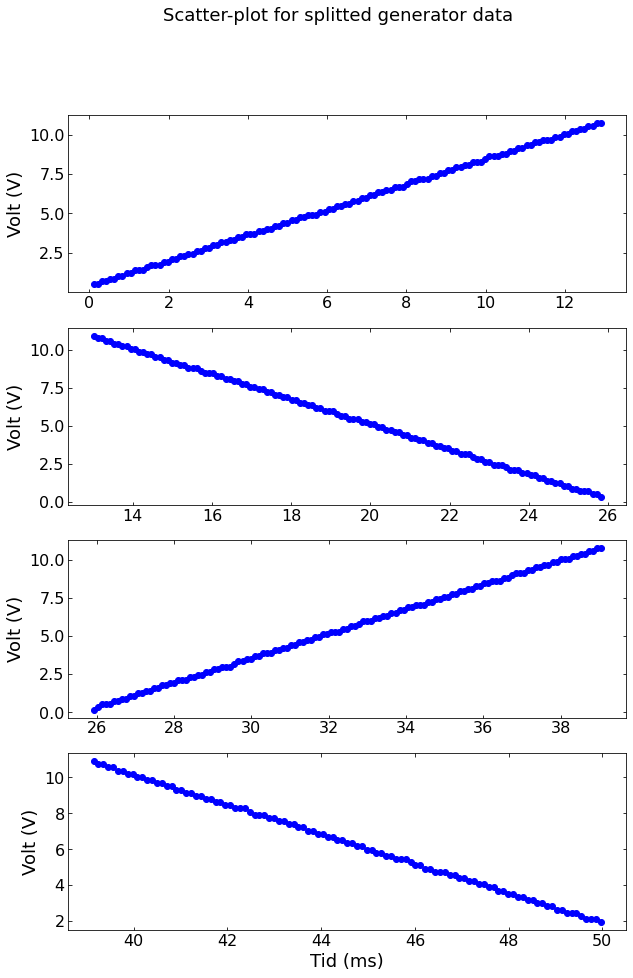

In [5]:
# Plot splitted generator data

# Make axis and fig and set suptitle
fig, axs = plt.subplots(len(splitted_data_generator), 1, figsize=(10, 15), sharex=False)
fig.suptitle('Scatter-plot for splitted generator data')

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.2)

# Loop through data
for i, sd in enumerate(splitted_data_generator):
    if len(splitted_data_generator) != 1:
        axs[i].scatter(sd[0], sd[1], color = 'blue')
        axs[i].set_ylabel('Volt (V)')
        if i == len(splitted_data_generator) - 1 and i >= 1:
            axs[i].set_xlabel('Tid (ms)')
    else:
        axs.scatter(sd[0], sd[1], color = 'blue')
        axs.set_xlabel('Tid (ms)')
        axs.set_ylabel('Volt (V)')
plt.show()

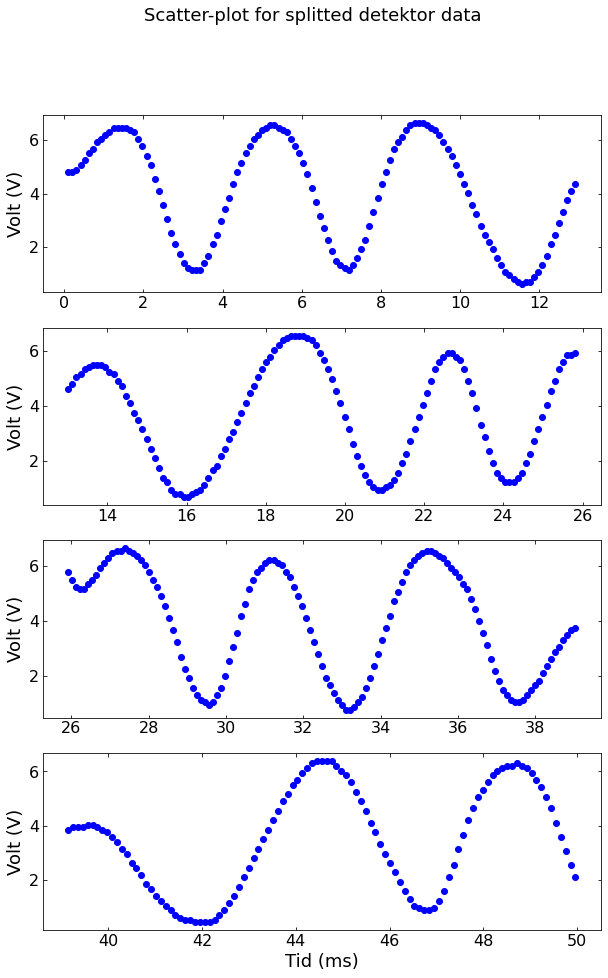

In [6]:
# Plot splitted detektor data

# Make axis and fig and set suptitle
fig, axs = plt.subplots(len(splitted_data_detektor), 1, figsize=(10, 15), sharex=False)
fig.suptitle('Scatter-plot for splitted detektor data')

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.2)

# Loop through data
for i, sd in enumerate(splitted_data_detektor):
    if len(splitted_data_detektor) != 1:
        axs[i].scatter(sd[0], sd[1], color = 'blue')
        axs[i].set_ylabel('Volt (V)')
        if i == len(splitted_data_detektor) - 1 and i >= 1:
            axs[i].set_xlabel('Tid (ms)')
    else:
        axs.scatter(sd[0], sd[1], color = 'blue')
        axs.set_xlabel('Tid (ms)')
        axs.set_ylabel('Volt (V)')
plt.show()

I nedenstående felt vises første af de fire dataframes, hvor spændingen stiger. Samme funktion som i data cleaning scriptet er først ind igen, hvor 2 parametre er ændret, således at den splitter detektor dataet, hvor toppunkterne sidder tættere sammen end i generator dataet. Funktion er næsten 100% vellykket i dette, hvilket er visualiseret i code felterne nedenunder. Nu skal spændings værdien fra generator dataet, hørende til hvert toppunkt udvælges, og størrelse af det teoretiske inkrement i længde der er sket i det piezoelektriske materiale skal udregnes og plottes sammen. Samme process kan udføres for de andre dataframes.

In [7]:
# Select rising voltage
df_0 = dfs[0]
df.head()

,Time,Volt_Generator,Volt_Detektor
0,39.142166,10.91105,3.844427
1,39.246270,10.73511,3.931779
2,39.350374,10.73511,3.931779
3,39.454478,10.55918,3.931779
4,39.558582,10.55918,4.019131


In [8]:
# Select falling voltage
df_1 = dfs[1]
df.head()

,Time,Volt_Generator,Volt_Detektor
0,39.142166,10.91105,3.844427
1,39.246270,10.73511,3.931779
2,39.350374,10.73511,3.931779
3,39.454478,10.55918,3.931779
4,39.558582,10.55918,4.019131


In [9]:
# Function to split data recursively
def split(data, sub_data, x_range, y_range):
    # Resulting list of splitted data
    result = []
    result_sub = []
    
    # Base case
    if abs(data[1][0] - data[1][-1]) > y_range and abs(data[0][0] - data[0][-1]) < x_range:
        return data, sub_data

    # Recursive step
    try: # Try to find a max, if its the first element, an error will be raised
        maks_index = data[1].index(max(data[1]))
        split_data = [[data[0][:maks_index], data[1][:maks_index]], [data[0][maks_index:], data[1][maks_index:]]]
        split_data_sub = [[sub_data[0][:maks_index], sub_data[1][:maks_index]], 
                          [sub_data[0][maks_index:], sub_data[1][maks_index:]]]
        for x, x_sub in zip(split_data, split_data_sub):
            if abs(x[1][0] - x[1][-1]) > y_range and abs(x[0][0] - x[0][-1]) < x_range:
                result.append(x)
                result_sub.append(x_sub)
            else:
                temp1, temp2 = split(x, x_sub, x_range, y_range)
                result += temp1
                result_sub += temp2
    except: # Given the error were raised, look for a minimum insted
        min_index = data[1].index(min(data[1]))
        split_data = [[data[0][:min_index], data[1][:min_index]], [data[0][min_index:], data[1][min_index:]]]
        split_data_sub = [[sub_data[0][:min_index], sub_data[1][:min_index]], 
                          [sub_data[0][min_index:], sub_data[1][min_index:]]]
        for x, x_sub in zip(split_data, split_data_sub):
            if abs(x[1][0] - x[1][-1]) > y_range and abs(x[0][0] - x[0][-1]) < x_range:
                result.append(x)
                result_sub.append(x_sub)
            else:
                temp1, temp2 = split(x, x_sub, x_range, y_range)
                result += temp1
                result_sub += temp2
    
    # Return result
    return result, result_sub

def select_datapoints(data, sub_data):
    datapoints = []
    sub_datapoints = []
    for i in range(len(data)):
        try:
            if i == 0:
                datapoints.append(data[i][0])
                datapoints.append(data[i][-1])
                sub_datapoints.append(sub_data[i][0])
                sub_datapoints.append(sub_data[i][-1])
            else:
                datapoints.append(data[i][-1])
                sub_datapoints.append(sub_data[i][-1])
        except:
            pass
    return datapoints, sub_datapoints

In [10]:
# Split data from function generator of df[0] with rising voltage
data_0 = [list(df_0['Time']), list(df_0['Volt_Detektor'])]
data_sub_0 = [list(df_0['Time']), list(df_0['Volt_Generator'])]
splitted_data_detektor_0, splitted_data_generator_0 = split(data_0.copy(), data_sub_0, 4, 2)

In [11]:
# Split data from function generator of df[1] with falling voltage
data_1 = [list(df_1['Time']), list(df_1['Volt_Detektor'])]
data_sub_1 = [list(df_1['Time']), list(df_1['Volt_Generator'])]
splitted_data_detektor_1, splitted_data_generator_1 = split(data_1.copy(), data_sub_1, 4, 2)

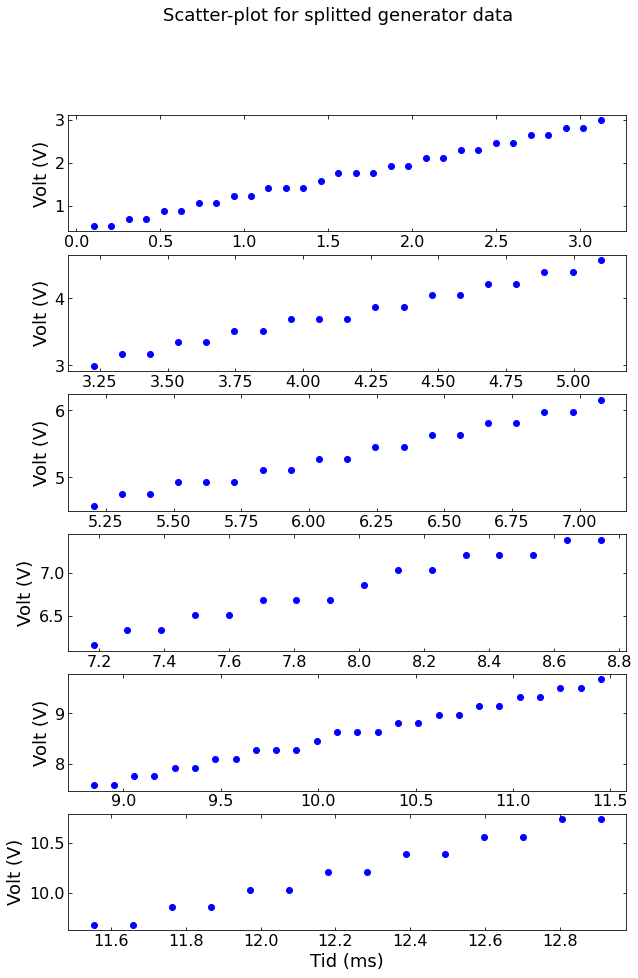

In [12]:
# Plot splitted generator data

# Make axis and fig and set suptitle
fig, axs = plt.subplots(len(splitted_data_generator_0), 1, figsize=(10, 15), sharex=False)
fig.suptitle('Scatter-plot for splitted generator data')

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.2)

# Loop through data
for i, sd in enumerate(splitted_data_generator_0):
    if len(splitted_data_generator_0) != 1:
        axs[i].scatter(sd[0], sd[1], color = 'blue')
        axs[i].set_ylabel('Volt (V)')
        if i == len(splitted_data_generator_0) - 1 and i >= 1:
            axs[i].set_xlabel('Tid (ms)')
    else:
        axs.scatter(sd[0], sd[1], color = 'blue')
        axs.set_xlabel('Tid (ms)')
        axs.set_ylabel('Volt (V)')
plt.show()

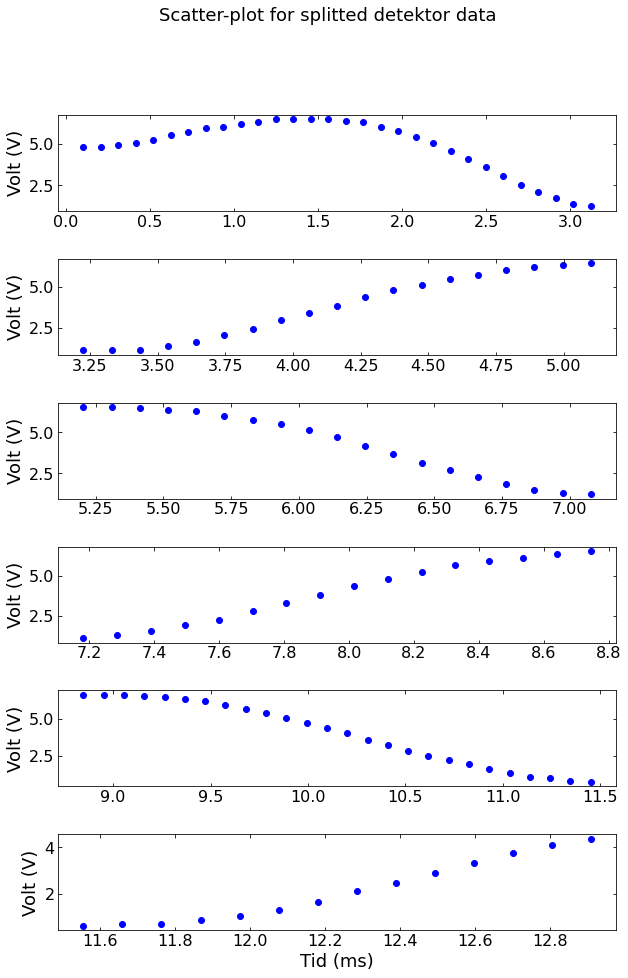

In [13]:
# Plot splitted detektor data

# Make axis and fig and set suptitle
fig, axs = plt.subplots(len(splitted_data_detektor_0), 1, figsize=(10, 15), sharex=False)
fig.suptitle('Scatter-plot for splitted detektor data')

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.5)

# Loop through data
for i, sd in enumerate(splitted_data_detektor_0):
    if len(splitted_data_detektor_0) != 1:
        axs[i].scatter(sd[0], sd[1], color = 'blue')
        axs[i].set_ylabel('Volt (V)')
        if i == len(splitted_data_detektor_0) - 1 and i >= 1:
            axs[i].set_xlabel('Tid (ms)')
    else:
        axs.scatter(sd[0], sd[1], color = 'blue')
        axs.set_xlabel('Tid (ms)')
        axs.set_ylabel('Volt (V)')
plt.show()

In [14]:
# Get datapoints at values of rising voltage
data_0 = [x[1] for x in splitted_data_detektor_0]
sub_data_0 = [x[1] for x in splitted_data_generator_0]
datapoints_0, sub_datapoints_0 = select_datapoints(data_0, sub_data_0)

In [15]:
# Get datapoints at values of falling voltage (below meantioned error is not fixed and might not need to)
data_1 = [x[1] for x in splitted_data_detektor_1]
data_1 = data_1[-6:] # Fixes error in recursive formula (it repeated the first rise and fall in voltage approx 10 times)
sub_data_1 = [x[1] for x in splitted_data_generator_1]
sub_data_1 = sub_data_1[-6:] # Fixes error in recursive formula (it repeated the first rise and fall in voltage approx 10 times)
datapoints_1, sub_datapoints_1 = select_datapoints(data_1, sub_data_1)

# Reverse subdatapoints such that it starts at V = 0 and ends at V = 10
sub_datapoints_1.reverse()

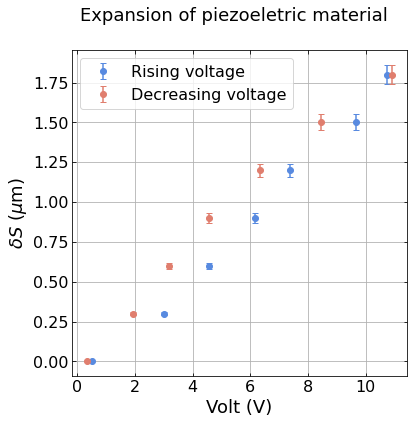

In [16]:
# Plot expansion of piezoeletric material without distribution

# Make axis and fig and set suptitle
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle('Expansion of piezoeletric material')

# Plot it
lamb = 600 * 10**(-3) # micrometer
lamb_err = 20 * 10**(-3) # micrometer
deltsS_0 = [lamb/2 * i for i in range(len(sub_datapoints_0))]
deltsS_0_err = [i/2 * lamb_err for i in range(len(sub_datapoints_0))]
c_0 = ['#588AE0' for i in range(len(sub_datapoints_0))]
deltsS_1 = [lamb/2 * i for i in range(len(sub_datapoints_1))]
deltsS_1_err = [i/2 * lamb_err for i in range(len(sub_datapoints_1))]
c_1 = ['#E07E6E' for i in range(len(sub_datapoints_1))]
axs.errorbar(sub_datapoints_0, deltsS_0, c = '#588AE0', fmt = 'o', 
             capsize = 3, yerr = deltsS_0_err, label = 'Rising voltage')
axs.errorbar(sub_datapoints_1, deltsS_1, c = '#E07E6E', fmt = 'o', 
             capsize = 3, yerr = deltsS_1_err, label = 'Decreasing voltage')
axs.set_ylabel(r'$\delta S$ ($\mu$m)')
axs.set_xlabel('Volt (V)')
axs.legend()
axs.grid()
plt.savefig('Expansion_of_piezoeletric_material.pdf')
plt.show()

In [17]:
# Use bootstrap to estimate parent distribution
dS = deltsS_0 + deltsS_1
sub_datapoints = sub_datapoints_0 + sub_datapoints_1
dS_means = []
sub_datapoints_means = []
for i in range(10000):
    dS_mean = []
    sub_datapoints_mean = []
    for i in range(len(dS)):
        dS_mean.append(dS[randint(0, len(dS) - 1)])
        sub_datapoints_mean.append(sub_datapoints[randint(0, len(sub_datapoints) - 1)])
    dS_means.append(np.mean(dS_mean))
    sub_datapoints_means.append(np.mean(sub_datapoints_mean))

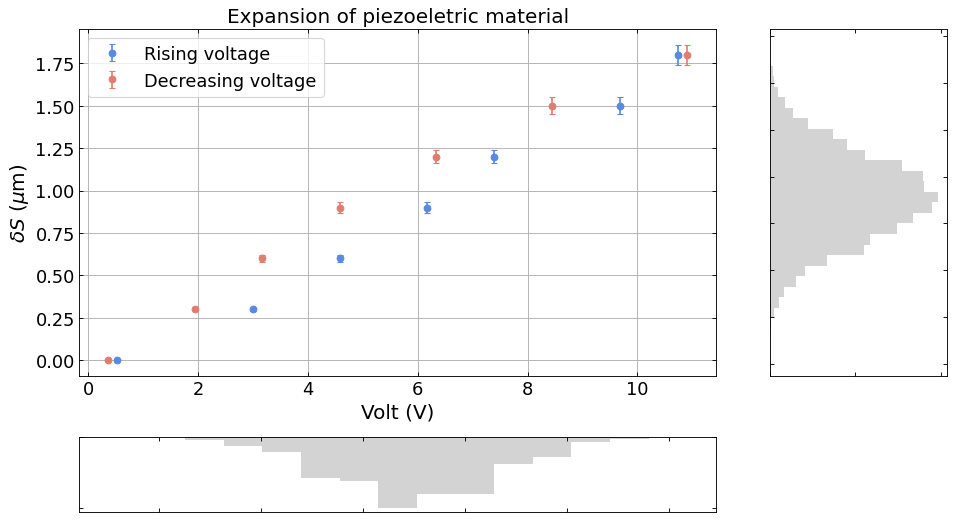

In [18]:
# Plot expansion of piezoeletric material with distribution

# Create Fig and gridspec
fig = plt.figure(figsize=(14, 8), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.8, wspace=0.3)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Errorbarplot on main ax (variables defined above)
ax_main.errorbar(sub_datapoints_0, deltsS_0, c = '#588AE0', fmt = 'o', 
             capsize = 3, yerr = deltsS_0_err, label = 'Rising voltage')
ax_main.errorbar(sub_datapoints_1, deltsS_1, c = '#E07E6E', fmt = 'o', 
             capsize = 3, yerr = deltsS_1_err, label = 'Decreasing voltage')

# histogram on the bottom
ax_bottom.hist(dS_means, 15, histtype='stepfilled', orientation='vertical', color='lightgray')
ax_bottom.invert_yaxis()

# histogram in the right
ax_right.hist(sub_datapoints_means, 30, histtype='stepfilled', orientation='horizontal', color='lightgray')

# Decorations
ax_main.set(title='Expansion of piezoeletric material')
ax_main.title.set_fontsize(18)

ax_main.set_ylabel(r'$\delta S$ ($\mu$m)')
ax_main.set_xlabel('Volt (V)')
ax_main.grid()
ax_main.legend()
plt.savefig('Expansion_of_piezoeletric_material_distribution.pdf')
plt.show()